In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("adult.csv",header=0,index_col=False,
                  names=['age','workclass','fnlwgt','education','education-num',
                        'marital-status','occupation','relationship','race','gender',
                        'capital-gain','capital-loss','hours-per-week','native-country','income'])

In [3]:
data = data[['age','workclass','education','gender','hours-per-week','occupation','income']]

In [4]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
1,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
2,53,Private,11th,Male,40,Handlers-cleaners,<=50K
3,28,Private,Bachelors,Female,40,Prof-specialty,<=50K
4,37,Private,Masters,Female,40,Exec-managerial,<=50K


In [5]:
print(data.gender.value_counts())

 Male      21789
 Female    10771
Name: gender, dtype: int64


### One Hot Encoding
- get_dummies -> 범주형 encoding

In [6]:
data_dummies = pd.get_dummies(data)

In [7]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,37,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
data_dummies.columns

Index(['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'gender_ Female', 'gender_ Male',
       'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
   

In [16]:
features = data_dummies.loc[:,'age':'occupation_ Transport-moving']
# Numpy array 추출
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape:{} y.shape:{}".format(X.shape,y.shape))

X.shape:(32560, 44) y.shape:(32560,)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print("Test score : {:.2f}".format(logreg.score(X_test,y_test)))

Test score : 0.81


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# 숫자와 문자 특성을 띈 DataFrame 생성
demo_df = pd.DataFrame({'숫자 특성':[0,1,2,1],
                        '범주형 특성':['양말','여우','양말','상자']})
display(demo_df)

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [19]:
pd.get_dummies(demo_df) # 숫자 특성만 바뀌지 않음

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [20]:
# demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df,columns=['숫자 특성','범주형 특성'])) # 열을 명시하면 모두 범주형으로 간주

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


#### OneHotEncoder / ColumnTransformer

In [21]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False) # Sparse Matrix가 아닌 Numpy Array return
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [22]:
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_상자' 'x1_양말' 'x1_여우']


In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [24]:
ct = ColumnTransformer(
    [("scaling",StandardScaler(), ['age','hours-per-week']),
    ("onehot", OneHotEncoder(sparse=False),
    ['workclass','education','gender','occupation'])])

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# income 제외 모든열 추출
data_features = data.drop('income',axis=1)

X_train,X_test,y_train,y_test = train_test_split(
    data_features, data.income,random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


- pd.get_dummies 때처럼 44개 특성 생성

In [31]:
X_train_trans[0]

array([-0.33671637, -0.03803174,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [27]:
logreg = LogisticRegression()
logreg.fit(X_train_trans,y_train)

X_test_trans = ct.transform(X_test)
print("테스트 점수 : {:.2f}".format(logreg.score(X_test_trans,y_test)))

테스트 점수 : 0.81


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

In [33]:
ct.named_transformers_.scaling

StandardScaler()

### make_column_transformer

In [36]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (['age','hours-per-week'],StandardScaler()),
    (['workclass','education','gender','occupation'],OneHotEncoder(sparse=False))
)

### 구간 분할 / 이산화

In [59]:
# 한글 깨짐 방지 코드
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")


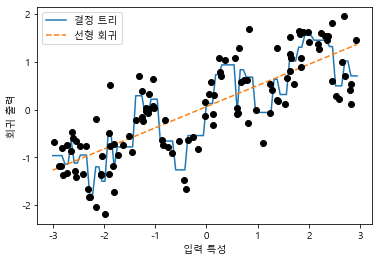

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mglearn
import numpy as np
import matplotlib.pyplot as plt

X,y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3,3,100, endpoint=False).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)
plt.plot(line, reg.predict(line), label="결정 트리")

reg = LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line), '--', label="선형 회귀")

plt.plot(X[:,0],y,'o',c='k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc='best')

In [62]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print('bin edges: \n', kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


In [63]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [65]:
print(X[:10])
X_binned.toarray()[:10] # 각각의 array가 어느 구간에 속하는지 OHE

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [72]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense') # ohe 밀집 배열
kb.fit(X)
X_binned = kb.transform(X)

In [76]:
X_binned.shape

(120, 10)

Text(0.5, 0, '입력특성')

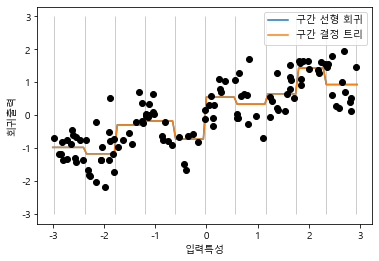

In [80]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned,y)
plt.plot(line, reg.predict(line_binned),label='구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line, reg.predict(line_binned),label='구간 결정 트리')
plt.plot(X[:,0],y,'o',c='k')
plt.vlines(kb.bin_edges_[0], -3, 3,linewidth=1,alpha=0.2)
plt.legend(loc='best')
plt.ylabel('회귀출력')
plt.xlabel('입력특성')

### interaction / polynomial 항 추가

In [89]:
X_binned.shape # (120, 10)
X.shape # (120, 1)

(120, 1)

In [88]:
X_combined = np.hstack([X,X_binned])
X_combined.shape

(120, 11)

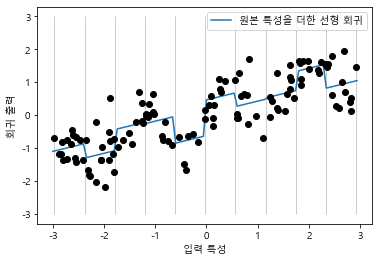

In [94]:
reg = LinearRegression().fit(X_combined,y)

line_combined = np.hstack([line,line_binned]) # 각각 (100,1) / (100,10)
plt.plot(line,reg.predict(line_combined), label='원본 특성을 더한 선형 회귀')

plt.vlines(kb.bin_edges_[0],-3,3, linewidth=1,alpha=0.2)
plt.legend(loc='best')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:,0],y,'o',c='k')

(100, 10)